<a href="https://colab.research.google.com/github/njsuriya/ML_clf_algorithms/blob/main/alexa_sentiment_ds_nbTrain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
from sklearn.model_selection import train_test_split 
import time
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.compose import make_column_transformer

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import ComplementNB

from sklearn.svm import SVC

from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [ ]:
senti_df = pd.read_csv("/content/AlexaSentimentAnalysis.csv")
senti_df = senti_df.drop(senti_df.columns[0],axis=1)
senti_df.head(3)

,review,polarity,division
0,able play youtube alexa,0.5000,positive
1,able recognize indian accent really well drop ...,0.2794,positive
2,absolute smart device amazon connect external ...,0.1827,positive


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


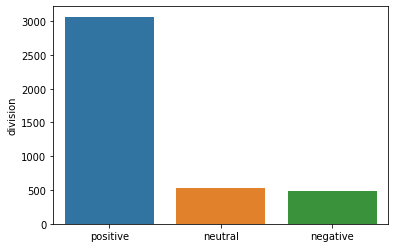

In [145]:
import seaborn as sns
x_label = senti_df.division.value_counts()
sns.barplot(x_label.index,x_label)

####### IMBALANCE DATASET #######

In [ ]:
input_features = senti_df.drop(['division','polarity'],axis='columns')
target = senti_df['division']
target

0       positive
1       positive
2       positive
3       positive
4       positive
          ...   
4079    positive
4080     neutral
4081     neutral
4082     neutral
4083    negative
Name: division, Length: 4084, dtype: object

In [ ]:
le = LabelEncoder()
target_lb_encoded = le.fit_transform(target)
target_lb_encoded

array([2, 2, 2, ..., 1, 1, 0])

In [ ]:
## ONE HOT ENCODER WILL CONVERT THE TARGET COLUMN TO MUTIPLE COLUMNS BASED ON THE UNIQUE CLASS 
ohe = OneHotEncoder()
# ohe_encoded = make_column_transformer((ohe,target))
ohe_encoded = ohe.fit_transform(target.values.reshape(-1,1))
ohe_encoded

<4084x3 sparse matrix of type '<class 'numpy.float64'>'
	with 4084 stored elements in Compressed Sparse Row format>

In [ ]:
countvector = CountVectorizer(stop_words='english')
features = countvector.fit_transform(input_features['review'])
x = countvector.get_feature_names_out()

In [ ]:
tfidf_vector = TfidfVectorizer()
features = tfidf_vector.fit_transform(input_features['review'])

In [147]:
x_train,x_test,y_train,y_test = train_test_split(features,target_lb_encoded,stratify=target)

In [ ]:
# le = LabelEncoder()
# target_lb_encoded = le.fit_transform(y_train)
# target_lb_encoded

In [ ]:
# countvector = CountVectorizer(stop_words='english')
# features = countvector.fit_transform(x_train['review'])
# x = countvector.get_feature_names_out()

In [148]:
clf_multinomial_nb = MultinomialNB()

In [149]:
# Since the Dataset is imbalanced applied Stratify selection improved accuracy from 80% to 82%

svc_clf = SVC().fit(x_train,y_train).score(x_test,y_test)
svc_clf

0.8246816846229187

In [150]:
clf_model = clf_multinomial_nb.fit(x_train,y_train)

In [151]:
clf_model.predict(x_test)

array([2, 2, 2, ..., 2, 2, 2])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


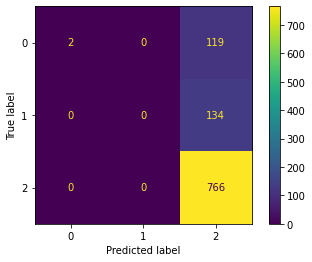

In [152]:
confusion_matrix(y_test,clf_model.predict(x_test))
plot_confusion_matrix(clf_model,x_test,y_test)

In [153]:
clf_model.score(x_test,y_test)

0.752203721841332